## Assignment 2 Basic ML

### Import Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
data = pd.read_csv('boston_housing.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


The Boston Housing Dataset
The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:
•	CRIM - per capita crime rate by town
•	ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
•	INDUS - proportion of non-retail business acres per town.
•	CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
•	NOX - nitric oxides concentration (parts per 10 million)
•	RM - average number of rooms per dwelling
•	AGE - proportion of owner-occupied units built prior to 1940
•	DIS - weighted distances to five Boston employment centres
•	RAD - index of accessibility to radial highways
•	TAX - full-value property-tax rate per $10,000
•	PTRATIO - pupil-teacher ratio by town
•	B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
•	LSTAT - lower status of the population (%)
•	MEDV - Median value of owner-occupied homes in $1000's

### Inspect Data

In [35]:
#Check Overall Data
data.shape

(506, 14)

In [36]:
#Chcek Null and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [37]:
#Statistic Descriptive 
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,5.060000e+02,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,5.060000e+02,506.000000,506.000000
mean,-4.475998e-17,3.534722e-16,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,-1.046594e-15,18.455534,7.835191e-16,12.653063,22.532806
std,1.000990e+00,1.000990e+00,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,1.000990e+00,2.164946,1.000990e+00,7.141062,9.197104
min,-4.197819e-01,-4.877224e-01,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,-1.313990e+00,12.600000,-3.907193e+00,1.730000,5.000000
25%,-4.109696e-01,-4.877224e-01,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,-7.675760e-01,17.400000,2.050715e-01,6.950000,17.025000
50%,-3.906665e-01,-4.877224e-01,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,-4.646726e-01,19.050000,3.811865e-01,11.360000,21.200000
75%,7.396560e-03,4.877224e-02,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,1.530926e+00,20.200000,4.336510e-01,16.955000,25.000000
max,9.933931e+00,3.804234e+00,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,1.798194e+00,22.000000,4.410519e-01,37.970000,50.000000


### Exploratory Data Analysis

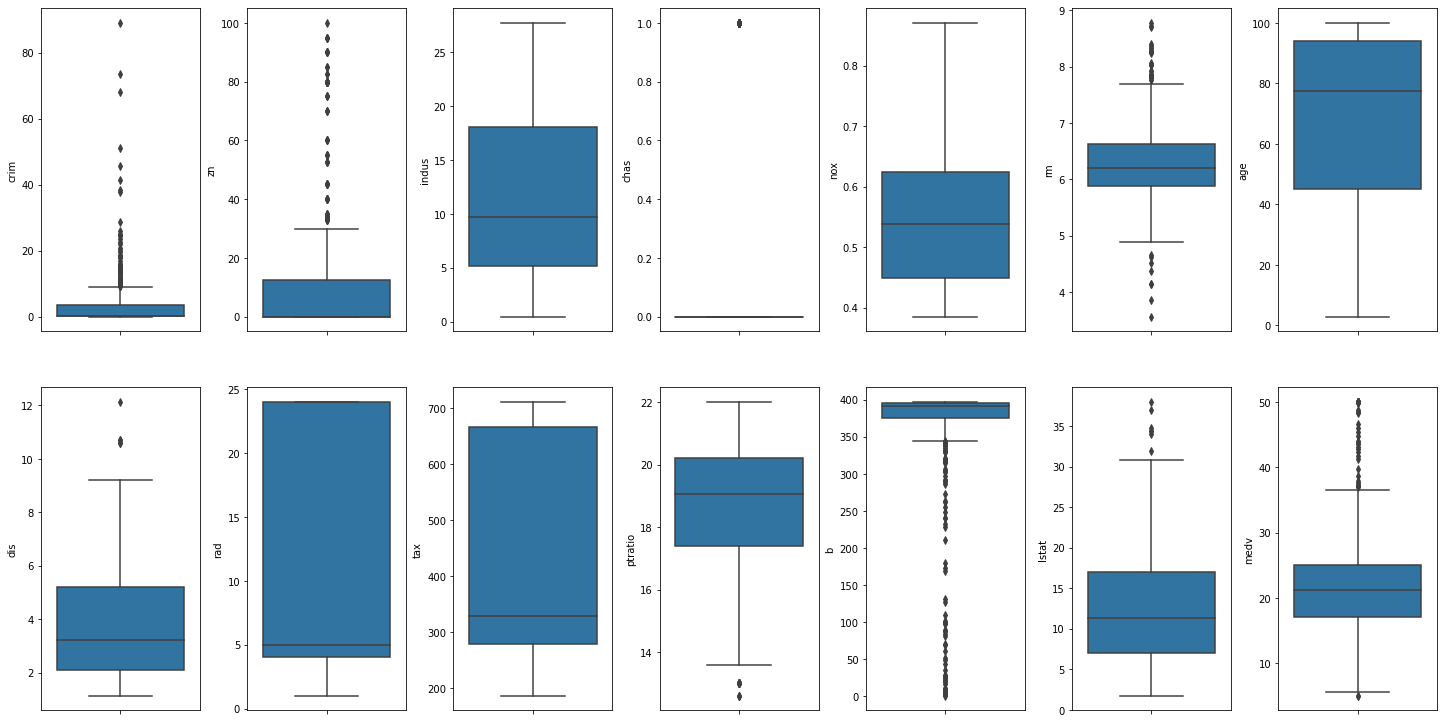

In [3]:
# Create Boxplot
fig, ax = plt.subplots(ncols =7, nrows =2, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.boxplot(y = col, data = data, ax = ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5)

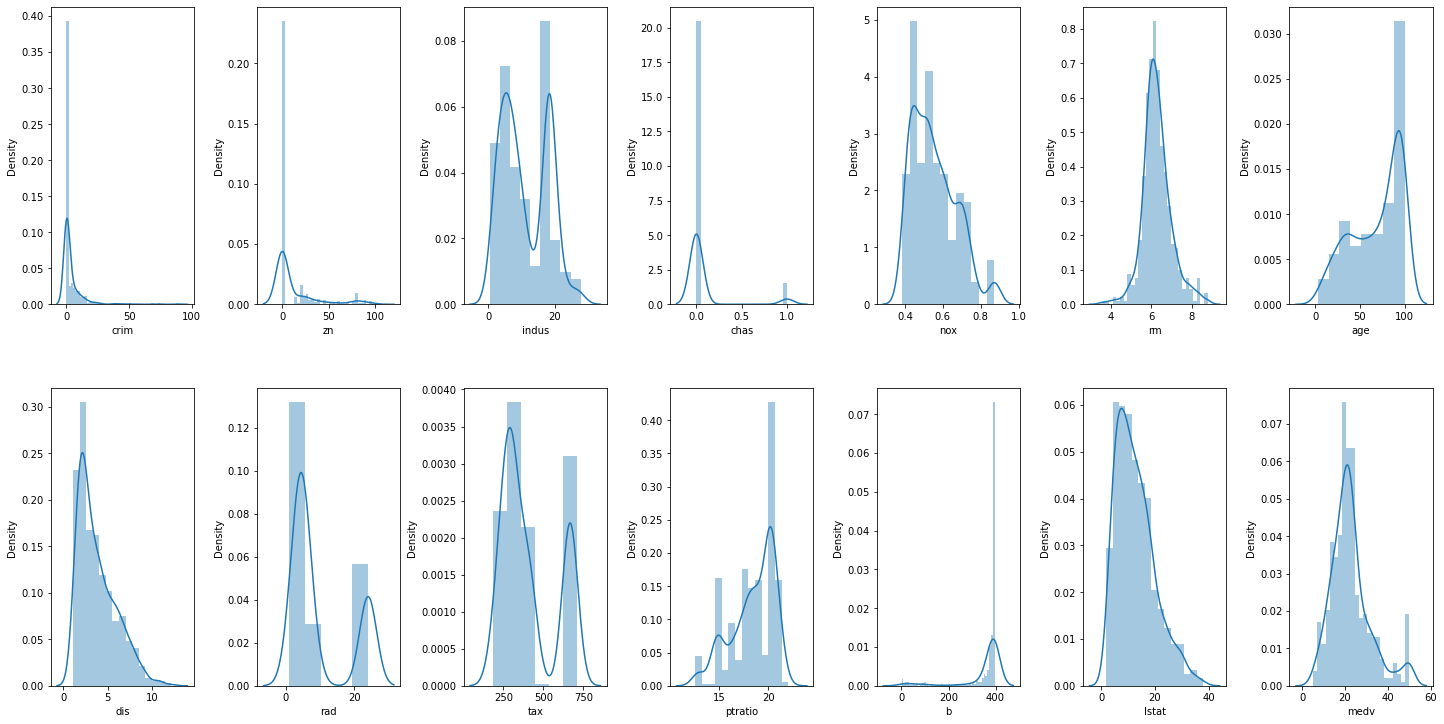

In [4]:
#Create Displot
fig, ax = plt.subplots(ncols =7, nrows =2, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.distplot(value, ax = ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5)

### Min Max Normalization

In [5]:
cols = ['crim', 'zn', 'tax', 'b']
for col in cols :
    minimum = min(data[col])
    maximum = max(data[col])
    data[col] = (data[col] - minimum) / (maximum - minimum)

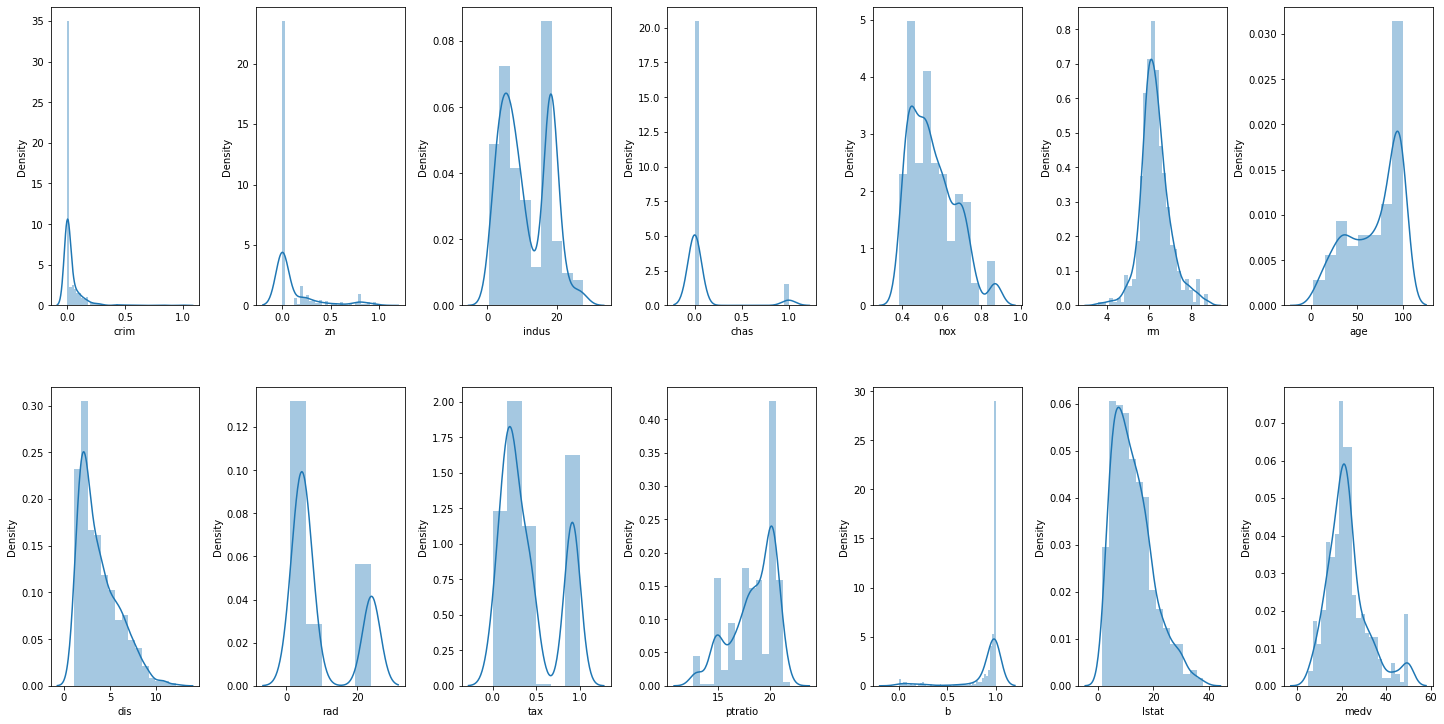

In [6]:
#Create Displot
fig, ax = plt.subplots(ncols =7, nrows =2, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.distplot(value, ax = ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5)

In [7]:
#Standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

#Fit Our Data
scaled_cols = scalar.fit_transform(data[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns = cols)
scaled_cols.head()

,crim,zn,tax,b
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [8]:
for col in cols :
    data[col] = scaled_cols[col]

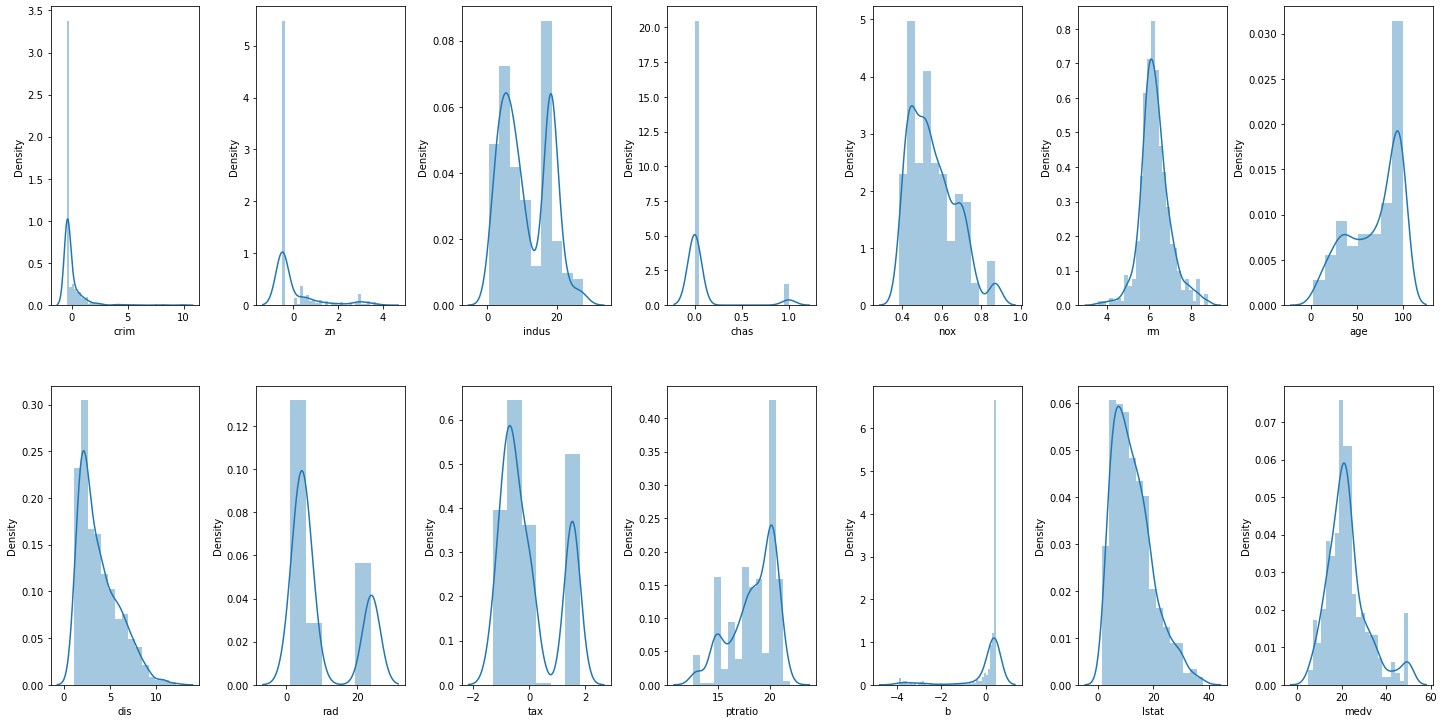

In [9]:
fig, ax = plt.subplots(ncols =7, nrows =2, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.distplot(value, ax = ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5)

<AxesSubplot:>

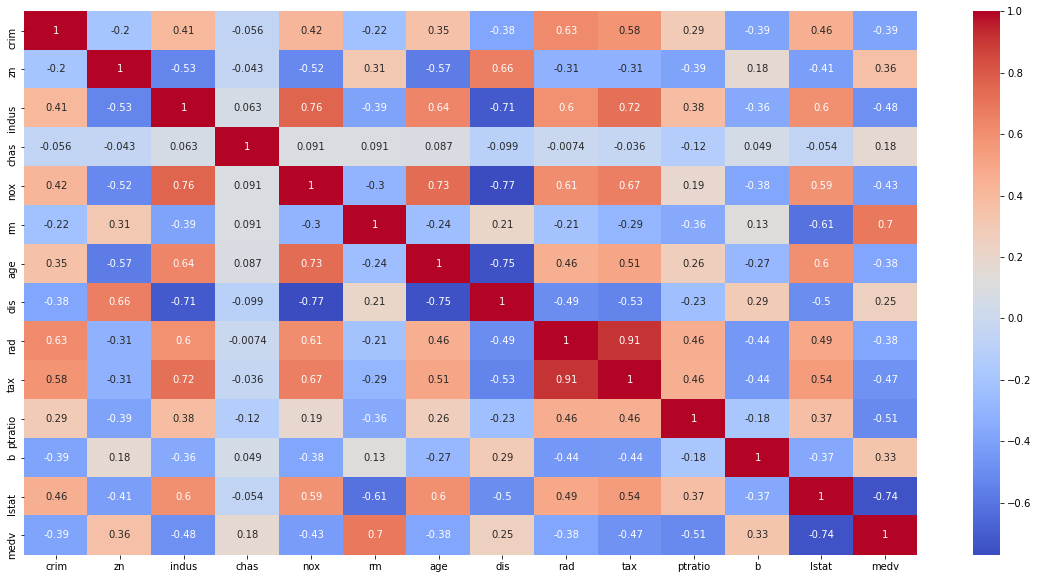

In [10]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot = True,cmap = 'coolwarm')

<AxesSubplot:xlabel='lstat', ylabel='medv'>

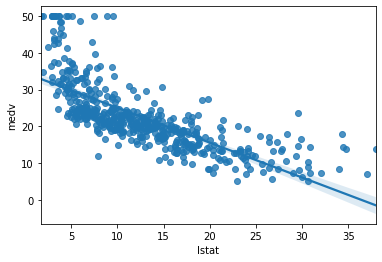

In [11]:
sns.regplot(y = data['medv'], x = data['lstat'])

<AxesSubplot:xlabel='rm', ylabel='medv'>

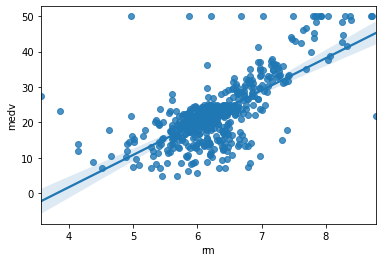

In [12]:
sns.regplot(y = data['medv'], x = data['rm'])

### Split Data and Training Data

In [21]:
X = data.drop(columns = ['medv', 'rad'], axis = 1)
y = data['medv']

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat
0,-0.419782,0.284830,2.31,0,0.538,6.575,65.2,4.0900,-0.666608,15.3,0.441052,4.98
1,-0.417339,-0.487722,7.07,0,0.469,6.421,78.9,4.9671,-0.987329,17.8,0.441052,9.14
2,-0.417342,-0.487722,7.07,0,0.469,7.185,61.1,4.9671,-0.987329,17.8,0.396427,4.03
3,-0.416750,-0.487722,2.18,0,0.458,6.998,45.8,6.0622,-1.106115,18.7,0.416163,2.94
4,-0.412482,-0.487722,2.18,0,0.458,7.147,54.2,6.0622,-1.106115,18.7,0.441052,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,11.93,0,0.573,6.593,69.1,2.4786,-0.803212,21.0,0.387217,9.67
502,-0.415249,-0.487722,11.93,0,0.573,6.120,76.7,2.2875,-0.803212,21.0,0.441052,9.08
503,-0.413447,-0.487722,11.93,0,0.573,6.976,91.0,2.1675,-0.803212,21.0,0.441052,5.64
504,-0.407764,-0.487722,11.93,0,0.573,6.794,89.3,2.3889,-0.803212,21.0,0.403225,6.48


In [14]:
# Membagi data menjadi the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Build Model

In [38]:
# Membuat model Multiple Linear Regression dari Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_test

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
56     24.7
455    14.1
60     18.7
213    28.1
108    19.8
Name: medv, Length: 102, dtype: float64

In [39]:
# Memprediksi hasil Test set
y_pred = regressor.predict(X_test)
y_pred

array([26.7289348 , 22.88350282, 28.8965238 , 11.80748085, 21.97888068,
       19.80847964, 19.46005354, 20.84394773, 19.01009502, 21.32546067,
        7.08511109, 16.15672207, 16.56740613,  5.1202732 , 40.81742942,
       32.89143533, 21.34885745, 37.41552179, 31.04313567, 23.04303563,
       24.78048639, 24.73918686, 21.54821182, 29.87039846, 21.99416215,
        9.27416431, 18.11103208, 19.12593835, 36.48039743, 21.82560603,
       17.47593929, 17.11197288, 19.64649961, 23.42742195, 29.07377725,
       19.01286368, 11.00380606, 24.16983584, 17.03783711, 14.5460208 ,
       25.5894178 , 20.47452353, 24.07716719, 14.47748335, 25.55550762,
       25.13772874, 19.31218023, 24.15837617, 10.58999192, 25.38947798,
       22.59952151, 18.1741546 , 23.79052666, 30.33858839, 14.62043327,
       21.51816798, 21.40292355, 16.6382719 , 14.86691882, 22.16311307,
       19.08900288, 21.7924526 , 32.54903647, 30.64856874, 16.91484982,
       33.53522359, 18.1260997 , 19.53167032, 18.6846626 , 22.68

In [40]:
# Memilih model multiple regresi yang paling baik dengan metode backward propagation
import statsmodels.api as sm
X_new = sm.add_constant(X)
X_opt = X_new.loc[:,['crim','zn','indus','chas','nox','rm','age','dis','tax','ptratio','b','lstat']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              938.8
Date:                Fri, 18 Jun 2021   Prob (F-statistic):                        0.00
Time:                        19:45:14   Log-Likelihood:                         -1531.1
No. Observations:                 506   AIC:                                      3086.
Df Residuals:                     494   BIC:                                      3137.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.5752      0.290     -1.987      0.047      -1.144      -0.006
zn             1.0819      0.337      3.206      0.001       0.419       1.745
indus         -0.0235      0.063     -0.376      0.707      -0.146       0.099
chas           3.0747      0.911      3.375      0.001       1.284       4.865
nox           -0.8180      3.318     -0.247      0.805      -7.337       5.701
rm             6.0404      0.318     19.023      0.000       5.417       6.664
age           -0.0097      0.014     -0.692      0.489      -0.037       0.018
dis           -0.9794      0.196     -4.989      0.000      -1.365      -0.594
tax           -0.8137      0.381     -2.135      0.033      -1.563      -0.065
ptratio       -0.2856      0.105     -2.711      0.007      -0.493      -0.079
b              0.9338      0.259      3.611      0.000       0.426       1.442
lstat         -0.4216      0.052     -8.138      0.000      -0.523      -0.320
==============================================================================
Omnibus:                      220.311   Durbin-Watson:                   0.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1563.915
Skew:                           1.747   Prob(JB):                         0.00
Kurtosis:                      10.872   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X_opt = X_new.loc[:, ['crim','zn','chas','rm','dis','tax','ptratio','b','lstat']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              1257.
Date:                Fri, 18 Jun 2021   Prob (F-statistic):                        0.00
Time:                        18:38:27   Log-Likelihood:                         -1531.6
No. Observations:                 506   AIC:                                      3081.
Df Residuals:                     497   BIC:                                      3119.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.5431      0.286     -1.900      0.058      -1.105       0.018
zn             1.1368      0.332      3.421      0.001       0.484       1.790
chas           2.9592      0.901      3.285      0.001       1.190       4.729
rm             5.8838      0.238     24.678      0.000       5.415       6.352
dis           -0.8815      0.171     -5.166      0.000      -1.217      -0.546
tax           -0.9238      0.340     -2.718      0.007      -1.592      -0.256
ptratio       -0.3063      0.102     -3.006      0.003      -0.507      -0.106
b              0.9265      0.257      3.598      0.000       0.421       1.432
lstat         -0.4511      0.042    -10.743      0.000      -0.534      -0.369
==============================================================================
Omnibus:                      213.518   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1423.545
Skew:                           1.704   Prob(JB):                    7.61e-310
Kurtosis:                      10.477   Cond. No.                         96.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
X_opt = X_new.loc[:, ['zn','chas','rm','dis','tax','ptratio','b','lstat']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              1406.
Date:                Fri, 18 Jun 2021   Prob (F-statistic):                        0.00
Time:                        19:50:30   Log-Likelihood:                         -1533.4
No. Observations:                 506   AIC:                                      3083.
Df Residuals:                     498   BIC:                                      3117.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
zn             1.0852      0.332      3.268      0.001       0.433       1.738
chas           3.0306      0.902      3.359      0.001       1.258       4.803
rm             5.8926      0.239     24.655      0.000       5.423       6.362
dis           -0.8512      0.170     -4.998      0.000      -1.186      -0.517
tax           -1.1415      0.321     -3.557      0.000      -1.772      -0.511
ptratio       -0.3077      0.102     -3.012      0.003      -0.508      -0.107
b              0.9967      0.255      3.901      0.000       0.495       1.499
lstat         -0.4629      0.042    -11.122      0.000      -0.545      -0.381
==============================================================================
Omnibus:                      208.151   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1405.647
Skew:                           1.647   Prob(JB):                    5.86e-306
Kurtosis:                      10.471   Cond. No.                         96.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Final Equation : y = 1.08*zn + 3.03*chas + 5.89*rm + 0.99*b - 0.85*dis -1.14*tax -0.31*ptratio -0.46*lstat

                                                                                                           Deka Dwi Abrianto